# Importing libraries 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
from tkinter import *

# Reading CSV file 

In [32]:
data = pd.read_csv("ADD.csv")


# Looking head of the Dataset


In [33]:
data.head()

,a,b,sum
0,1.0,1.0,2.0
1,7.0,4.0,11.0
2,8.0,56.0,64.0
3,44.0,7.0,51.0
4,2.0,3.0,5.0


# Looking tail of the Dataset

In [34]:
data.tail()

,a,b,sum
11,2.0,23.0,25.0
12,551.0,12.0,563.0
13,62.4,686.0,748.4
14,52.3,51.4,103.7
15,55.0,50.0,105.0


# Looking #of raws and #of columns

In [35]:
data.shape

(16, 3)

# Looking information about the DataFram

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       16 non-null     float64
 1   b       16 non-null     float64
 2   sum     16 non-null     float64
dtypes: float64(3)
memory usage: 512.0 bytes


# EDA


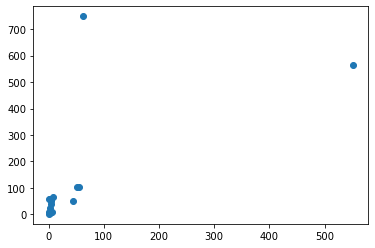

In [37]:
plt.scatter(data["a"],data["sum"])

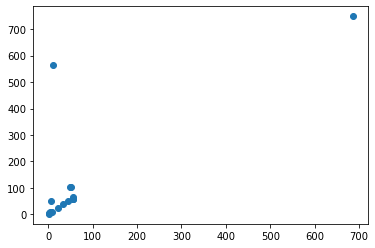

In [38]:
plt.scatter(data["b"],data["sum"])

# Store feature Matrix in X and Response (Target) Vector y

In [39]:
X = data[["a","b"]]
y = data["sum"]

# Split into train data and test data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
X_train

,a,b
8,0.0,57.0
9,5.0,45.0
2,8.0,56.0
15,55.0,50.0
4,2.0,3.0
7,3.0,57.0
10,4.0,34.0
12,551.0,12.0
3,44.0,7.0
6,1.0,8.0


## Creating model 

In [42]:
model = LinearRegression()

# Model training

In [43]:
model.fit(X_train,y_train)

LinearRegression()

## Model's Prediction performance

In [44]:
model.score(X_train,y_train)


1.0

In [45]:
model.score(X_test,y_test)

1.0

## Compair the results

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred

array([  2. ,  11. ,  60. , 103.7, 748.4,  25. ])

## Compair it with the actual value 

In [48]:
y_test

0       2.0
1      11.0
5      60.0
14    103.7
13    748.4
11     25.0
Name: sum, dtype: float64

## Compair using a data frame 

In [49]:
df = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
0,2.0,2.0
1,11.0,11.0
5,60.0,60.0
14,103.7,103.7
13,748.4,748.4
11,25.0,25.0


## Prediction on new samples

In [50]:
model.predict([[2,5]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.])

## Save the model using joblib or pickel 

In [51]:
joblib.dump(model,'model_joblib')


['model_joblib']

## Load the model

In [52]:
it = joblib.load('model_joblib')

## Get predictions

In [53]:
it.predict([[27,50]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([77.])

In [54]:
it.predict([[10000,5]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10005.])

## Training the entire dataset

In [55]:
X = data[['a','b']]

In [56]:
y = data['sum']

In [57]:
model.fit(X,y)

LinearRegression()

##  Save the model 

In [58]:
joblib.dump(model,'model_joblib')
model=joblib.load('model_joblib')
model.predict([[50,50]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([100.])

## Run the ML application using GUI  

In [62]:
master = Tk()
master.title("Addition of two numbers using ML")
ladel = Label(master,text="addition of two numbers using ML",bg="black",fg="white").grid(row=0,columnspan=2)

In [63]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    model=joblib.load('model_joblib')
    result=model.predict([[p1,p2]])
    Label(master,text='sum is = ').grid(row=4)
    Label(master,text= result).grid(row=5)
    print("sum is", result)

Label(master,text="Enter First Number").grid(row=1)
Label(master,text="Enter Second Number").grid(row=2)
e1=Entry(master)
e2=Entry(master)
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
Button(master,text='predict',command=show_entry_fields).grid()
mainloop()